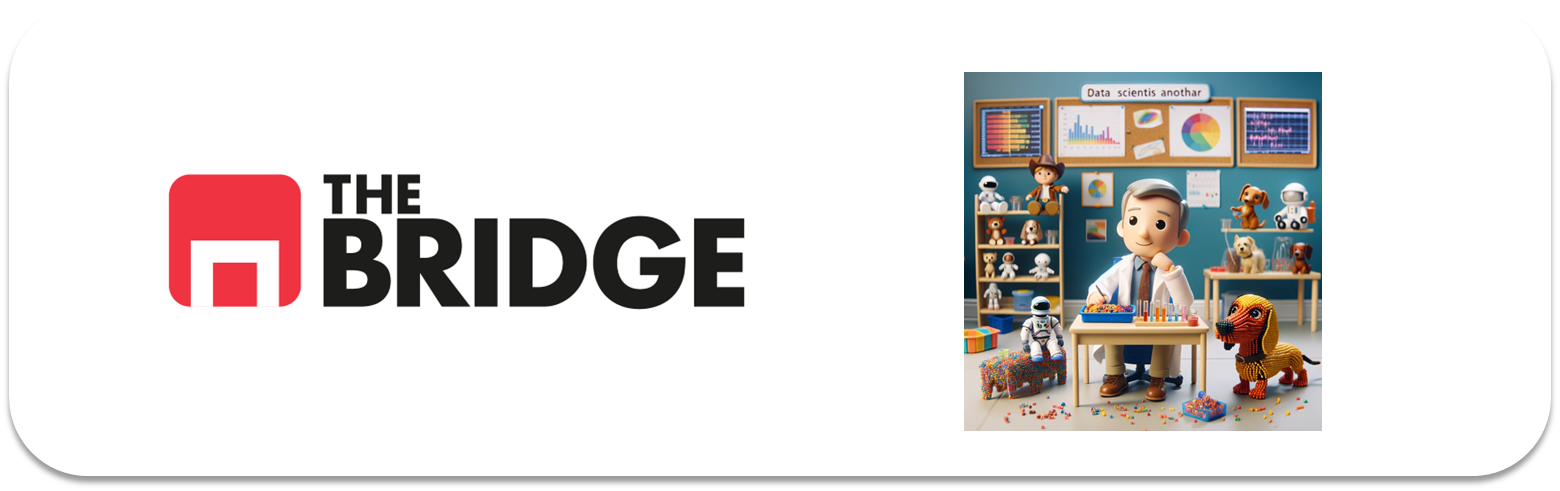

## PRACTICA OBLIGATORIA: **Análisis Univariante**

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from bootcampviztools import pinta_distribucion_categoricas, plot_combined_graphs


### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [5]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [7]:
df_titanic = sns.load_dataset("titanic")

### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [8]:
print(df_titanic.head())

print(df_titanic.info())

print(df_titanic.isna().sum())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [ ]:
print((df_titanic.isna().mean() * 100).sort_values(ascending=False)) #nulos por columna

deck           77.216611
age            19.865320
embarked        0.224467
embark_town     0.224467
sex             0.000000
pclass          0.000000
survived        0.000000
fare            0.000000
parch           0.000000
sibsp           0.000000
class           0.000000
adult_male      0.000000
who             0.000000
alive           0.000000
alone           0.000000
dtype: float64


In [10]:
#Se elimina "deck" porque tiene demasiados nulos
df_titanic = df_titanic.drop(columns=["deck", "parch"])

# Rellenamos edad con la mediana por clase (robusta ante outliers)

df_titanic["age"] = df_titanic["age"].fillna(
    df_titanic.groupby("class")["age"].transform("median"))

# Rellenamos embarked con la moda (la categoría más frecuente)
df_titanic["embarked"] = df_titanic["embarked"].fillna(df_titanic["embarked"].mode()[0])


C:\Users\lllse\AppData\Local\Temp\ipykernel_20300\725829147.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_titanic.groupby("class")["age"].transform("median"))


In [11]:
(df_titanic.isna().mean() * 100).sort_values(ascending=False)


embark_town    0.224467
pclass         0.000000
sex            0.000000
age            0.000000
survived       0.000000
sibsp          0.000000
fare           0.000000
class          0.000000
embarked       0.000000
who            0.000000
adult_male     0.000000
alive          0.000000
alone          0.000000
dtype: float64

### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.




| Columna/Variable | Descripción |
| ---------------- | ----------- |
| -       | - |



| Columna/Variable | Descripción |
| ---------------- | ----------- |
| survived | Indica si el pasajero sobrevivió (0 = no, 1 = sí). |
| pclass | Clase del billete (1 = 1ª, 2 = 2ª, 3 = 3ª). |
| sex | Sexo del pasajero (male/female). |
| age | Edad del pasajero en años (con nulos imputados en el paso 1.3). |
| sibsp | Número de hermanos/as y/o cónyuge que viajan con el pasajero a bordo. |
| fare | Precio del billete (tarifa pagada). |
| embarked | Inicial del puerto donde embarcó el pasajero (S, C, Q). |
| class | Clase del pasajero en formato texto (First/Second/Third). |
| who | Categoría simplificada del pasajero según edad/sexo (man/woman/child). |
| adult_male | True si es hombre adulto, False en caso contrario. |
| embark_town | Ciudad de embarque (Southampton/Cherbourg/Queenstown). |
| alive | Estado final (yes = sobrevivió, no = falleció). |
| alone | True si viajaba solo (sin familiares a bordo según variables familiares). |



### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [14]:
df_titanic["embarked"] = df_titanic["embarked"].replace({
    "S": "Southampton",
    "C": "Cherbourg",
    "Q": "Queenstown"
})

df_titanic["embarked"].value_counts()


embarked
Southampton    646
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

### #2.1 Categóricas

In [15]:
cat_vars = ["survived", "who", "class", "embarked", "alone"] #variables a analizar

df_titanic[cat_vars].head()


,survived,who,class,embarked,alone
0,0,man,Third,Southampton,False
1,1,woman,First,Cherbourg,False
2,1,woman,Third,Southampton,True
3,1,woman,First,Southampton,False
4,0,man,Third,Southampton,True


In [16]:
# Para cada categórica mostramos:
# - conteo absoluto
# - porcentaje (frecuencia relativa * 100)
for c in cat_vars:
    display(df_titanic[c].value_counts())
    display((df_titanic[c].value_counts(normalize=True) * 100).round(2))


survived
0    549
1    342
Name: count, dtype: int64

survived
0    61.62
1    38.38
Name: proportion, dtype: float64

who
man      537
woman    271
child     83
Name: count, dtype: int64

who
man      60.27
woman    30.42
child     9.32
Name: proportion, dtype: float64

class
Third     491
First     216
Second    184
Name: count, dtype: int64

class
Third     55.11
First     24.24
Second    20.65
Name: proportion, dtype: float64

embarked
Southampton    646
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

embarked
Southampton    72.50
Cherbourg      18.86
Queenstown      8.64
Name: proportion, dtype: float64

alone
True     537
False    354
Name: count, dtype: int64

alone
True     60.27
False    39.73
Name: proportion, dtype: float64

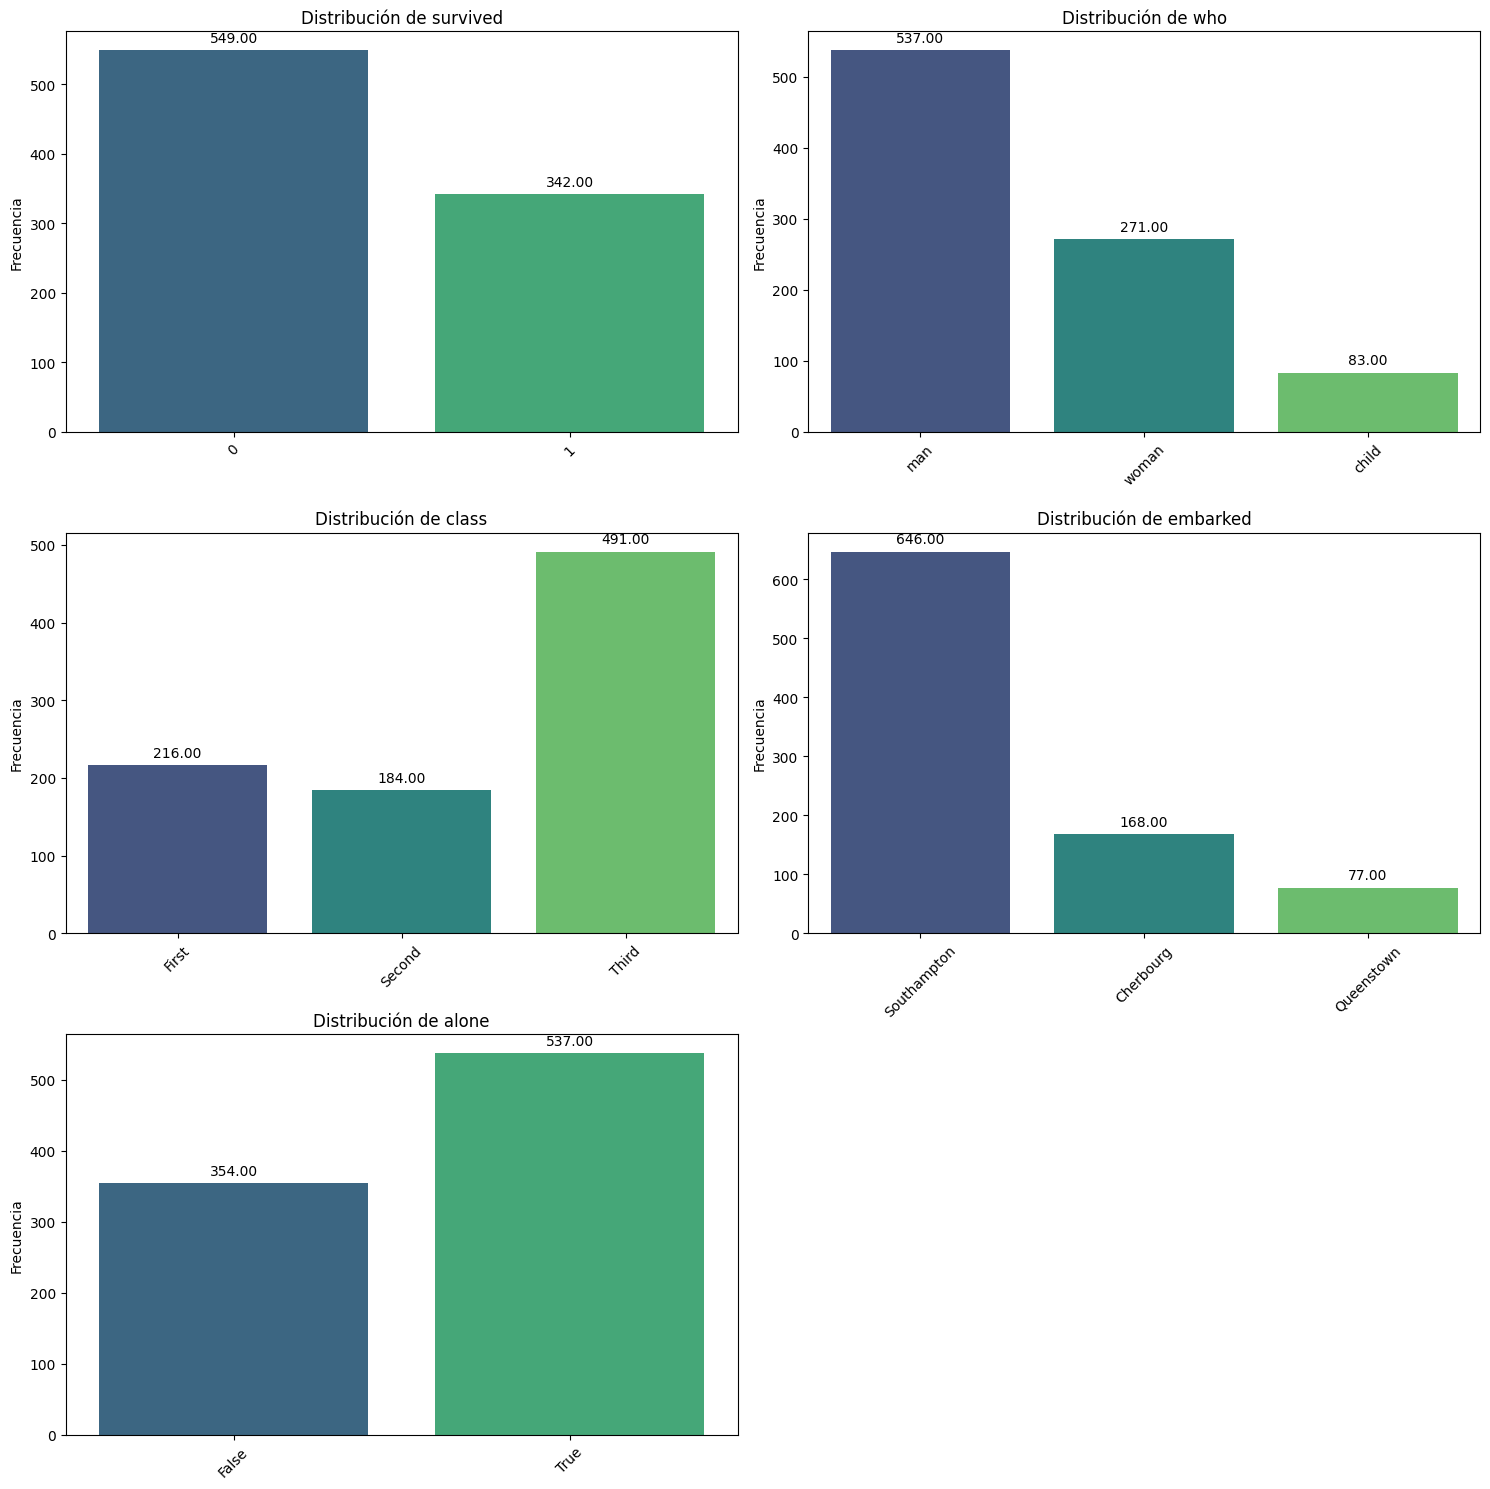

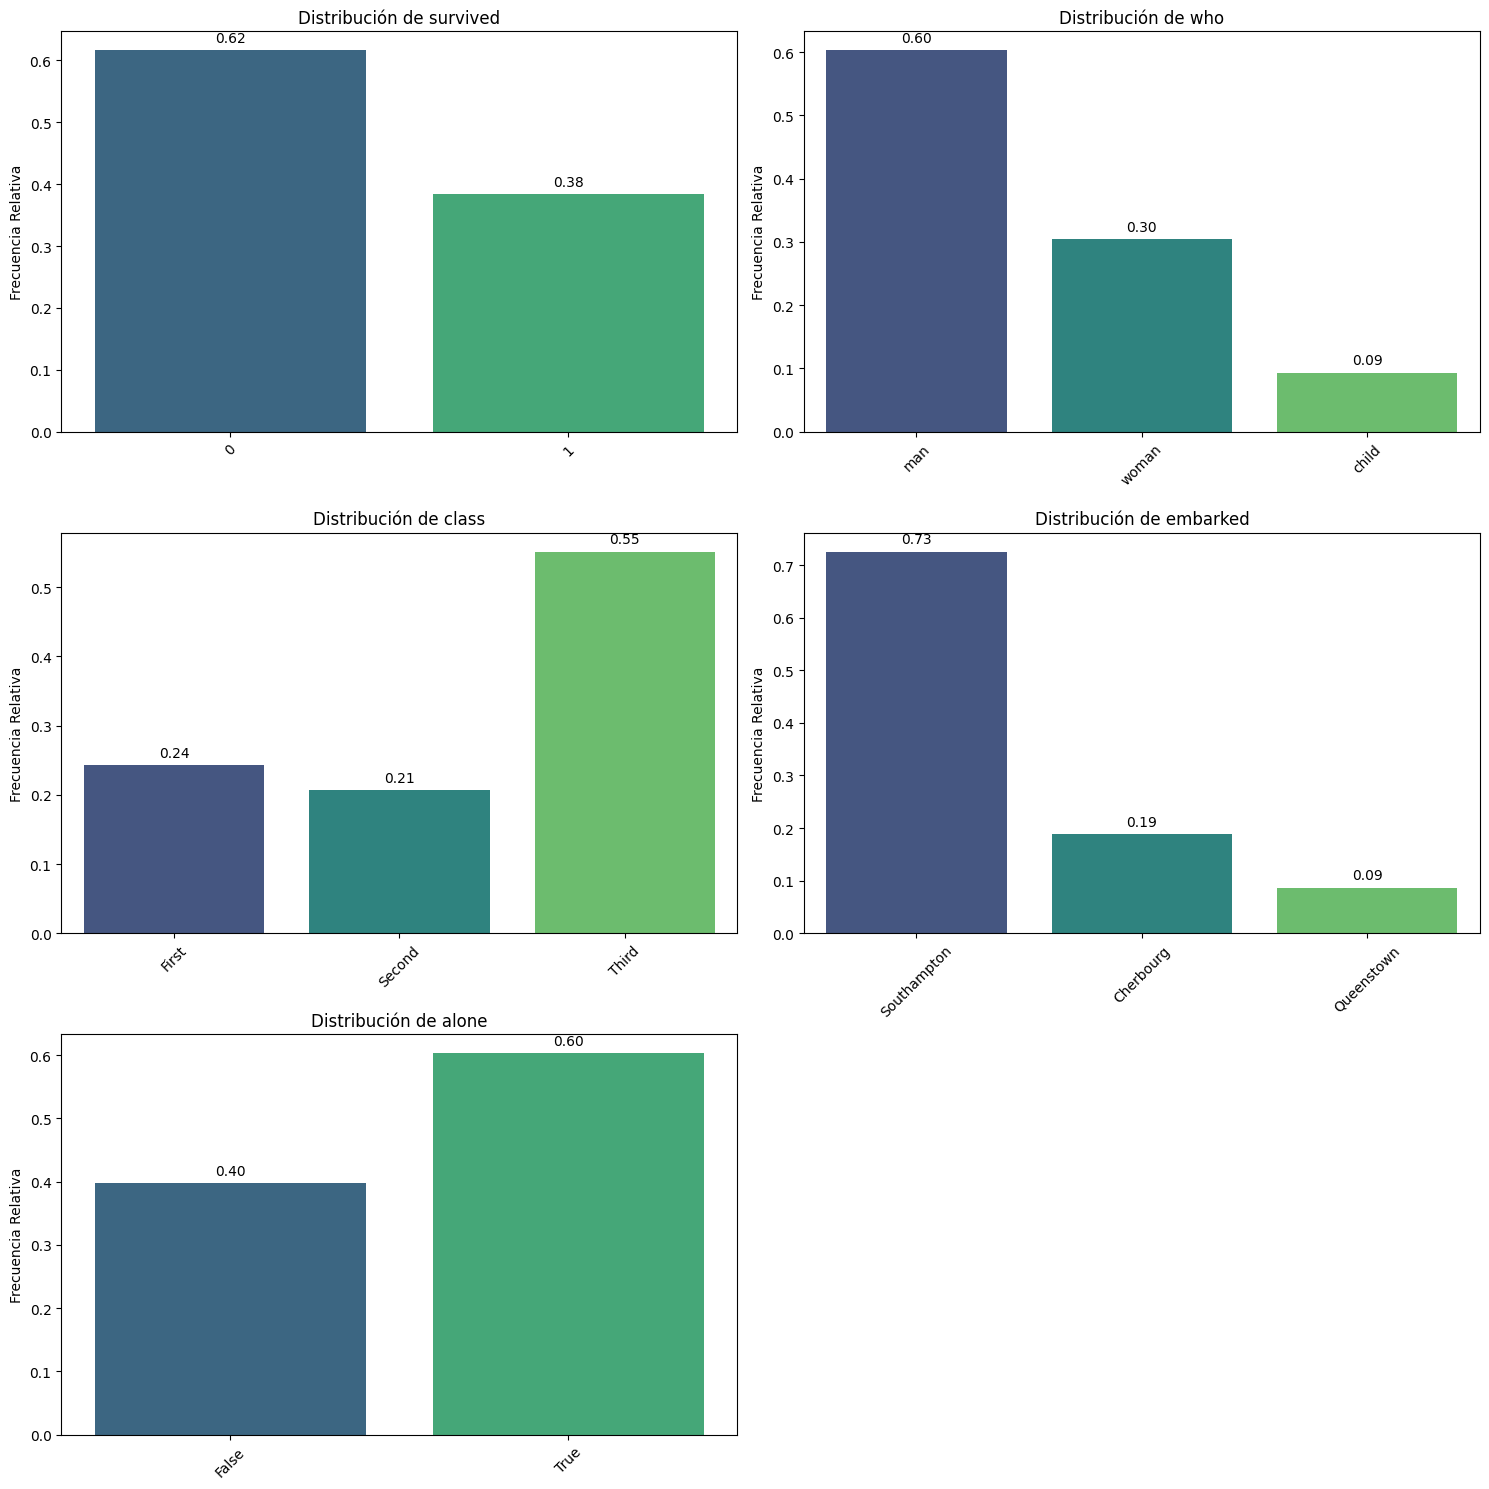

In [17]:
# Gráficas de conteo (frecuencia absoluta) 
pinta_distribucion_categoricas(df_titanic, cat_vars, relativa=False, mostrar_valores=True)

# Gráficas de porcentaje (frecuencia relativa)
pinta_distribucion_categoricas(df_titanic, cat_vars, relativa=True, mostrar_valores=True)


### #2.2 Numéricas

In [18]:
num_vars = ["age", "fare"]

df_titanic[num_vars].describe()

,age,fare
count,891.000000,891.000000
mean,29.066409,32.204208
std,13.244532,49.693429
min,0.420000,0.000000
25%,22.000000,7.910400
50%,26.000000,14.454200
75%,37.000000,31.000000
max,80.000000,512.329200


(2, 2)


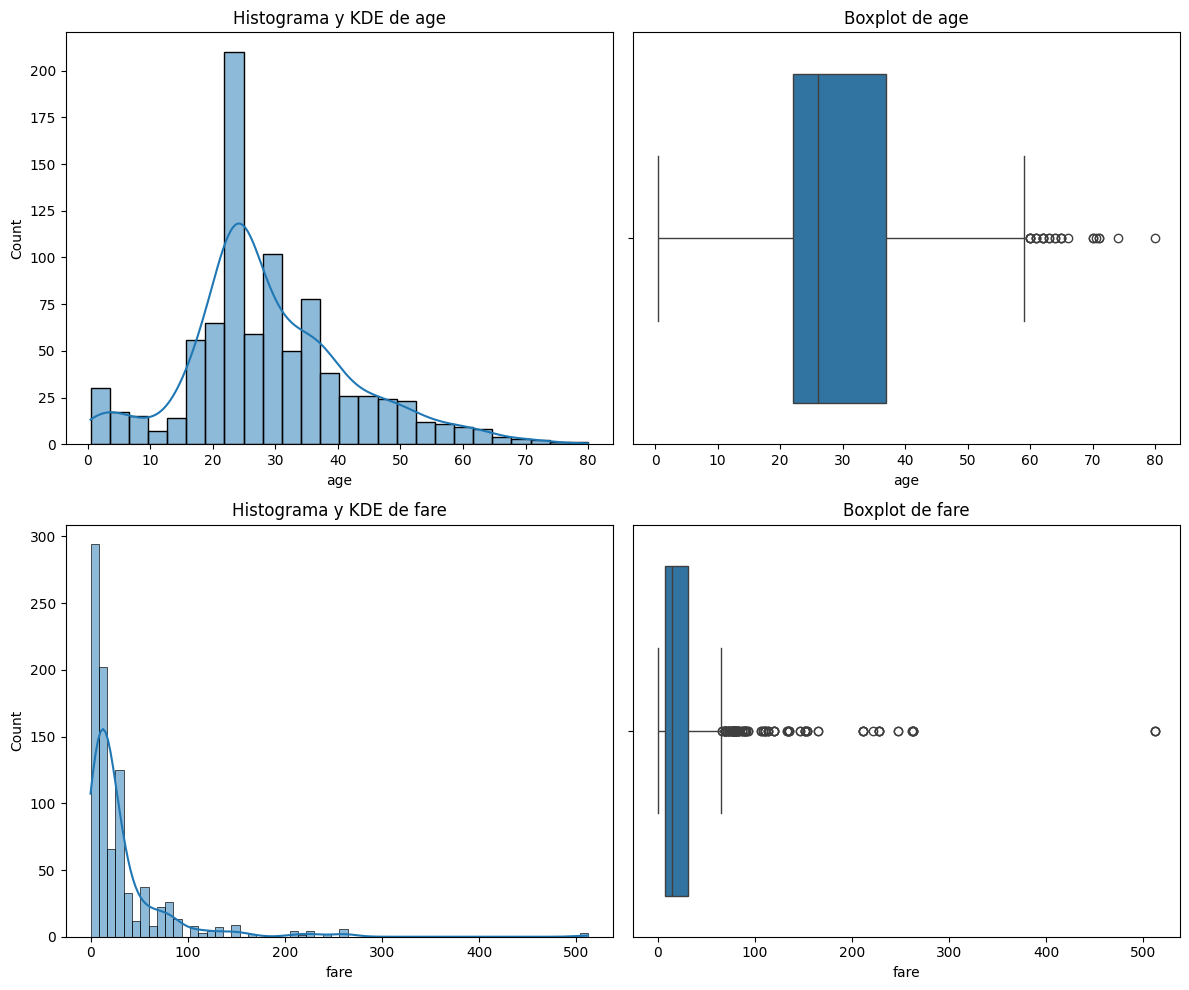

In [19]:
# Para cada numérica:
# - histograma con KDE
# - boxplot
plot_combined_graphs(df_titanic, num_vars)


### Conclusiones – Variables categóricas

Survived: la mayoría de los pasajeros no sobrevivieron, lo que indica una tasa de mortalidad elevada.

Who: los hombres constituyen el grupo más numeroso a bordo, seguido de mujeres y niños.

Class: la tercera clase concentra el mayor número de pasajeros.

Embarked: la mayoría de los pasajeros embarcaron en Southampton, muy por encima del resto de puertos.

Alone: una proporción significativa de pasajeros viajaba sola.

### Conclusiones – Variables numéricas

Age: la distribución está sesgada a la derecha, con mayor concentración de pasajeros adultos jóvenes y presencia de valores extremos.

Fare: presenta un fuerte sesgo positivo, con la mayoría de tarifas bajas y algunos valores muy altos considerados outliers.

### Conclusión general

El análisis univariante muestra un conjunto de datos heterogéneo, con claras diferencias en la distribución de las variables categóricas y una fuerte asimetría en las variables numéricas. Estas características justifican el uso de medidas robustas y un análisis multivariante posterior para entender mejor los factores asociados a la supervivencia.